# Cliqué Máximo

Integrantes:
- Marvin Daniel Cely Báez
- Laura Camila rojas Valbuena

Librerias

In [335]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import pylab as pl
%matplotlib inline

- crear vectores del grafo

In [307]:
#completa el vertice con los ceros faltantes
def addZeros(numBin,n):
    zeros = ''
    for i in range(n-len(numBin)):
        zeros+='0'
    return zeros + numBin

#Crea una lista de combinaciones binarias
def binaryVectors(n):
    bv = []
    maxVectors = 2**n
    for i in range(maxVectors):
        numBin = bin(i).lstrip('0b') #Quitar referencia de binario
        bv.append(addZeros(numBin,n))
    return bv

- Prueba de la funcion binaryVectors(n)

In [308]:
print binaryVectors(2)
print binaryVectors(3)

['00', '01', '10', '11']
['000', '001', '010', '011', '100', '101', '110', '111']


- Algoritmo de Bron-Kerbosch

In [309]:
#Investigado: http://www.dfki.de/~neumann/ie-seminar/presentations/finding_cliques.pdf
# https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm#Example
#Tomao de: http://www.it1me.com/it-answers?id=13904636&ttl=Implementing+Bron%E2%80%93Kerbosch+algorithm+in+python

#function determines the neighbors of a given vertex
def N(vertex,graph):
    c = 0
    l = []
    for i in graph[vertex]:
        if i is 1 :
            l.append(c)
        c+=1   
    return l 

#the Bron-Kerbosch recursive algorithm
def bronk(r,p,x,graph,cliques):
    if len(p) == 0 and len(x) == 0:
        #print r
        cliques.append(r)
        return
    for vertex in p[:]:
        r_new = r[::]
        r_new.append(vertex)
        p_new = [val for val in p if val in N(vertex,graph)] # p intersects N(vertex)
        x_new = [val for val in x if val in N(vertex,graph)] # x intersects N(vertex)
        bronk(r_new,p_new,x_new,graph,cliques)
        p.remove(vertex)
        x.append(vertex)

def BronKerbosch_Algorithm(graph,v):
    cliques = []
    bronk([],v, [],graph,cliques)
    return cliques

- Distancia de hamming

In [310]:
#tomado de:
#https://stackoverflow.com/questions/31007054/hamming-distance-between-two-binary-strings-not-working
def hammingDistance(s1, s2):
    """Calculate the Hamming distance between two bit strings"""
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

- Implementacion del grafo con Algoritmo de Bron-Kerbosch

In [330]:
#Crea una matriz cuadrada llena de 0s segun la cantidad de vertices del grafo 
def zerolistmaker(n):
    return [[0] * n for i in range(n)]

#Genera una Matriz de Adyacencia segun las aristas del grafo
def Create_Adja_Mat(graph):
    edges = nx.edges(graph)
    vertex = nx.nodes(graph)
    vertex.sort()
    numberVertex = nx.number_of_nodes(graph)
    AdjacencyMatrix = zerolistmaker(numberVertex)
    for i in edges:
        x = vertex.index(i[0])
        y = vertex.index(i[1])
        AdjacencyMatrix[x][y] = 1        
    return AdjacencyMatrix, numberVertex

#Retorna el tamaño mas grande de la lista de cliques
def lenMaxClique(Cliques):
    maxi = 0
    for i in Cliques:
        if maxi < len(i):
            maxi = len(i)
    return maxi
        
#Crea el grafo de hamming
def HammingGraph(n,d,grafica):
    if n < d:
        return 0
    graph = nx.DiGraph()
    #Agregar Vertices
    bv = binaryVectors(n)
    graph.add_nodes_from(bv)
    #Agregar las Aristas
    for i in bv:
        for j in bv:
            hammingDist = hammingDistance(i,j)
            if i <> j and hammingDist >= d:
                #Añadir el peso
                graph.add_weighted_edges_from([(i,j,hammingDist)])
    if grafica:
        nx.draw_circular(graph)
        plt.show()
    
    AdjacencyMatrix, numberVertex  = Create_Adja_Mat(graph)
    #Algoritmo de Bron-Kerbosch
    Cliques = BronKerbosch_Algorithm(AdjacencyMatrix,range(numberVertex))    
    return lenMaxClique(Cliques)      
                

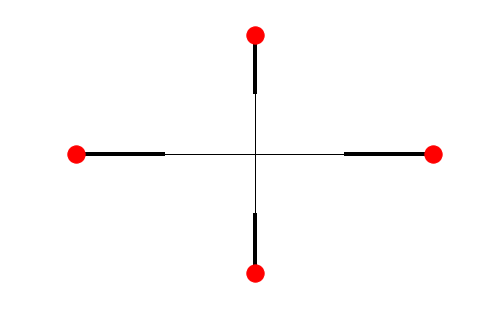

Cuando
A( 2 , 2 )
El Cliqué Máximo es 2


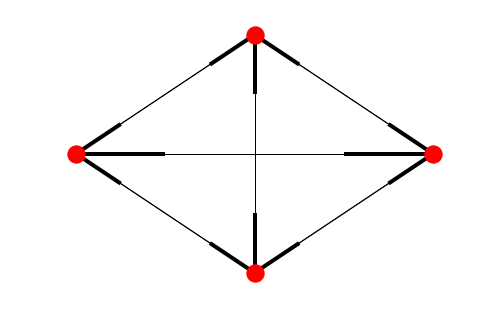

Cuando
A( 2 , 1 )
El Cliqué Máximo es 4


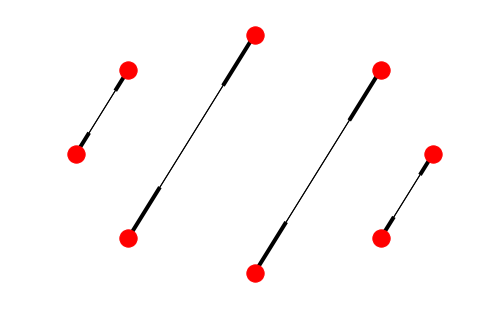

Cuando
A( 3 , 3 )
El Cliqué Máximo es 2


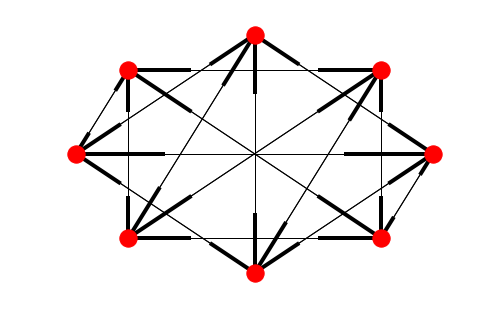

Cuando
A( 3 , 2 )
El Cliqué Máximo es 4


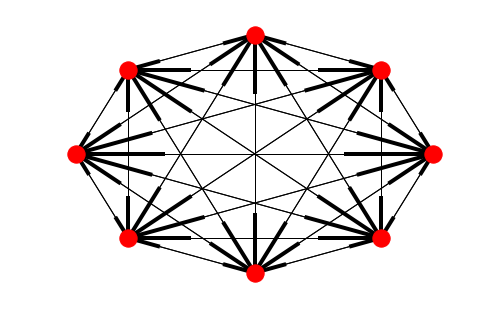

Cuando
A( 3 , 1 )
El Cliqué Máximo es 8


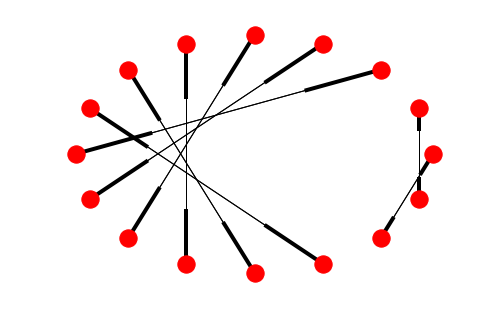

Cuando
A( 4 , 4 )
El Cliqué Máximo es 2


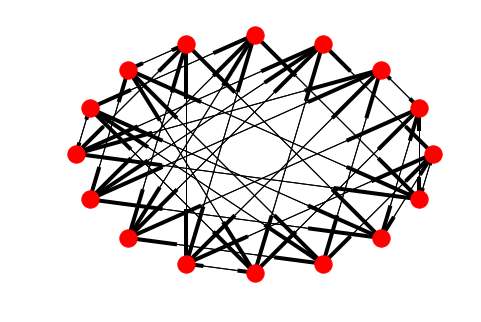

Cuando
A( 4 , 3 )
El Cliqué Máximo es 2


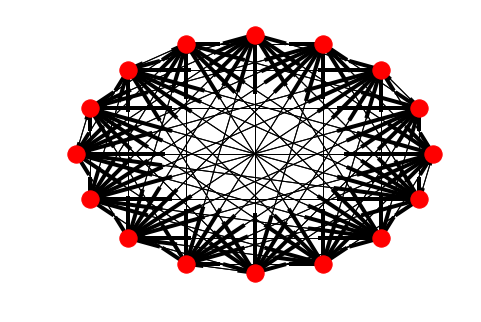

Cuando
A( 4 , 2 )
El Cliqué Máximo es 8


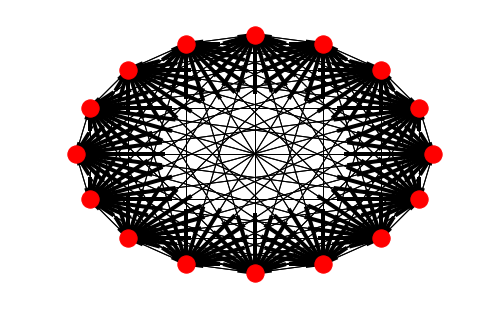

Cuando
A( 4 , 1 )
El Cliqué Máximo es 16


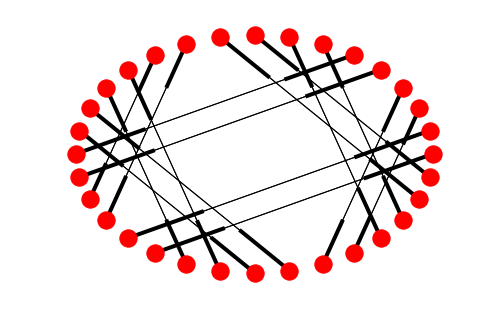

Cuando
A( 5 , 5 )
El Cliqué Máximo es 2


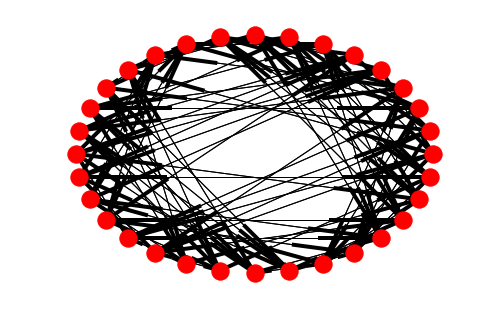

Cuando
A( 5 , 4 )
El Cliqué Máximo es 2


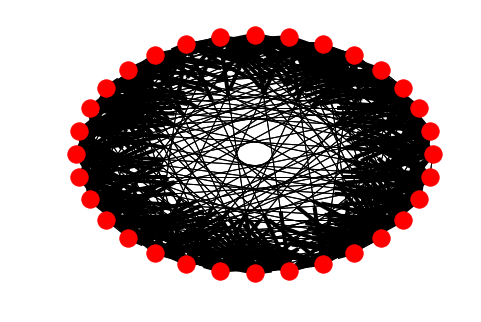

Cuando
A( 5 , 3 )
El Cliqué Máximo es 4


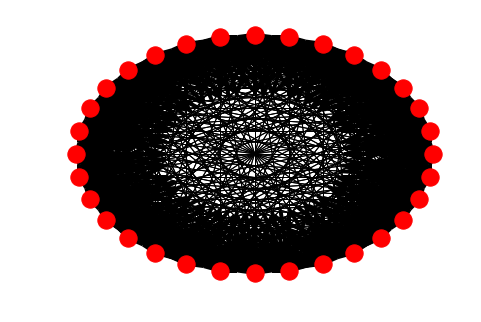

Cuando
A( 5 , 2 )
El Cliqué Máximo es 16


In [400]:
def GrafosHamming(dimenciones):
    for n in range(2,dimenciones+1):
        for d in range(n,0,-1):
            if not(n==5 and d==1):
                MaxClique = HammingGraph(n,d,True)            
                print 'Cuando'
                print 'A(',n,',',d,')'
                print "El Cliqué Máximo es", MaxClique
GrafosHamming(5)

# Análisis del Algoritmo

Para representar la eficiencia es el algoritmo se va a medir los tiempos de ejecucion segun las n dimensiones y las distancias de Hamming ≥ d sabiendo que el algoritmo es np-completo. en este caso utilisaremos grafos completos hasta 4 dimenciones.

In [398]:
tic = time.clock()#get start time
toc = time.clock()#get final time
def Recalculatedtime(t1,t2):    
    return t2 - t1

def analysis_time_Hamming(dimenciones):
    results = []
    for n in range(2,dimenciones+1):
        for d in range(n,0,-1):
            if not(n==5 and d==1):
                tic = time.clock()#get start time
                HammingGraph(n,d,False)
                toc = time.clock()#get final time
                results.append(Recalculatedtime(tic,toc))
    return results
analysis_time_Hamming(5)

[0.00028199999997013947,
 0.0006970000000592336,
 0.000979000000029373,
 0.0012659999999868887,
 0.006642000000056214,
 0.002583999999956177,
 0.004479000000060296,
 0.034333999999944353,
 2.031925000000001,
 0.006005999999956657,
 0.009846000000038657,
 0.042966999999976,
 14.376702000000023]

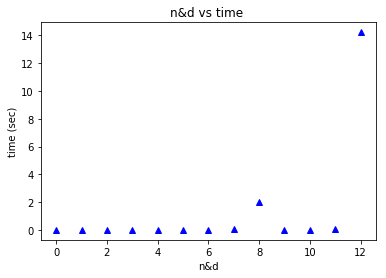

In [399]:
timeshamming = analysis_time_Hamming(5)
pl.clf()
lt = pl.title('n&d vs time ')
lx = pl.xlabel('n&d')
ly = pl.ylabel('time (sec)')
xit = np.arange(len(timeshamming))
yit = np.array(timeshamming)
pl.plot(xit, yit, 'b^')

Al ser un problema np-completo, los recursos necesarios para ejecutar el algoritmo cada vez son exponenciales. Es por eso que al usar un grafo completo de 5 dimenciones la ejecucion tarda mas de lo debido.

Fin.